In [1]:
import pandas as pd

# Path to Dev version of autots library
sys.path.append(os.environ['DEV_AUTOTS'])
from auto_ts import AutoTimeSeries as ATS

Running Auto Timeseries version: 0.0.23.b2...


In [2]:
%load_ext autoreload
%autoreload 2

# Load Dataset

In [3]:
datapath = '../example_datasets/'
filename1 = 'Sales_and_Marketing.csv'
dataset = pd.read_csv(datapath+filename1, index_col=None)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Time Period        48 non-null     object 
 1   Sales              48 non-null     int64  
 2   Marketing Expense  48 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.2+ KB


In [4]:
dataset.head()

,Time Period,Sales,Marketing Expense
0,2011-01-01,397,486.64
1,2011-02-01,400,501.80
2,2011-03-01,498,437.09
3,2011-04-01,536,565.16
4,2011-05-01,596,744.15


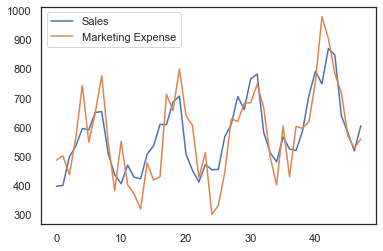

In [5]:
dataset[['Sales', 'Marketing Expense']].plot()

# Train Model

In [6]:
ts_column = 'Time Period'
target = 'Sales'
sep = ','

In [7]:
FORECAST_PERIOD = 3

In [8]:
train = dataset[:-FORECAST_PERIOD]
test = dataset[-FORECAST_PERIOD:]
print(train.shape, test.shape)

(45, 3) (3, 3)


In [9]:
automl_model = ATS(
    score_type='rmse',
    forecast_period=FORECAST_PERIOD,
    model_type='best', verbose=0
)        

In [10]:
automl_model.fit(
    traindata=train,
    ts_column=ts_column,
    target=target,
    cv=3,
    sep=sep)        

Start of Fit.....
    Target variable = Sales
Start of loading of data.....
Input is data frame. Performing Time Series Analysis
ts_column: Time Period sep: , target: Sales
    Dataframe loaded successfully. Shape of data set = (45, 2)
Time Interval of obserations has not been provided. Program will try to figure this out now...
Time series input in days = 31
It is a Monthly time series.


Building Prophet Model



Running Facebook Prophet Model...
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
Num Test Obs Per fold
cutoff
2013-11-29    4
2014-03-01    3
2014-06-01    3
Name: ds, dtype: int64
    RMSE = 45.69
    Std Deviation of Originals = 126.24
    Normalized RMSE = 36%
    RMSE = 61.07
    Std Deviation of Originals = 126.24
    Normalized RMSE = 48%
    RMSE = 32.76
    Std Deviation of Originals = 126.24
    Normalized RMSE = 26%


Building PyFlux Model



Running PyFlux Model...
Pyflux is not installed - hence not running PyFlux model
    PyFlux not installed. Install PyFl

# Evaluate Results

In [11]:
automl_model.get_leaderboard()

,name,rmse
0,Prophet,46.504940
5,ML,74.847572
3,SARIMAX,88.311054
2,ARIMA,158.453015
4,VAR,177.556479
1,PyFlux,inf


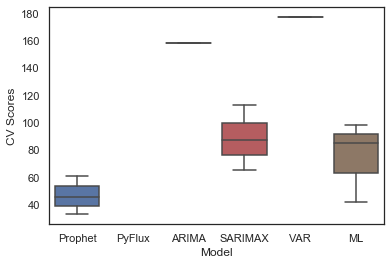

In [12]:
automl_model.plot_cv_scores()

In [13]:
automl_model.get_cv_scores()

,Model,CV Scores
0,Prophet,45.690736
1,Prophet,61.068527
2,Prophet,32.755559
3,PyFlux,inf
4,ARIMA,158.453015
5,SARIMAX,65.009759
6,SARIMAX,87.330687
7,SARIMAX,112.592717
8,VAR,177.556479
9,ML,41.597362


In [14]:
results_dict = automl_model.get_ml_dict()

In [15]:
results_dict['Prophet']['forecast']  
# This has CV implemented, however the folds are not consistent with SARIMAX (more work needed to fix)

[          ds        yhat  yhat_lower  yhat_upper    y     cutoff
 0 2013-12-01  573.330011  558.471429  588.451044  567 2013-11-29
 1 2014-01-01  546.630624  532.320710  561.948523  525 2013-11-29
 2 2014-02-01  568.215260  552.144554  583.550580  520 2013-11-29
 3 2014-03-01  661.282629  645.910047  676.368447  587 2013-11-29,
           ds        yhat  yhat_lower  yhat_upper    y     cutoff
 4 2014-04-01  645.648850  629.020610  662.431561  710 2014-03-01
 5 2014-05-01  718.298738  701.021702  734.457172  793 2014-03-01
 6 2014-06-01  710.701881  693.259742  726.984307  749 2014-03-01,
           ds        yhat  yhat_lower  yhat_upper    y     cutoff
 7 2014-07-01  823.625503  798.209506  850.001821  871 2014-06-01
 8 2014-08-01  831.943272  807.836815  857.409034  848 2014-06-01
 9 2014-09-01  666.769730  640.918559  691.161186  640 2014-06-01]

In [16]:
results_dict['ARIMA']['forecast'] # CV not implemented yet

,mean,mean_se,mean_ci_lower,mean_ci_upper
Forecast_1,683.578,63.0513,559.999184,807.155908
Forecast_2,647.89,86.0729,479.190636,816.590280
Forecast_3,652.291,96.4619,463.229175,841.352815


In [17]:
results_dict['SARIMAX']['forecast'] # This has CV implemented

[Sales             mean    mean_se  mean_ci_lower  mean_ci_upper
 2014-01-01  537.618582  82.121826     376.662762     698.574403
 2014-02-01  620.327104  92.615891     438.803294     801.850915
 2014-03-01  636.538366  96.327817     447.739314     825.337418,
 Sales             mean    mean_se  mean_ci_lower  mean_ci_upper
 2014-04-01  613.469517  81.317062     454.091003     772.848031
 2014-05-01  678.476454  91.605123     498.933713     858.019196
 2014-06-01  770.122734  94.130433     585.630477     954.614992,
 Sales             mean     mean_se  mean_ci_lower  mean_ci_upper
 2014-07-01  739.126541   91.660362     559.475533     918.777550
 2014-08-01  716.211030  103.077197     514.183435     918.238624
 2014-09-01  697.205051  103.823200     493.715319     900.694784]

In [18]:
results_dict['VAR']['forecast'] # CV not implemented yet

Sales,mean,mean_se,mean_ci_lower,mean_ci_upper
2014-07-01,679.388306,66.519399,549.012680,809.763931
2014-08-01,616.451528,93.304934,433.577218,799.325838
2014-09-01,574.814317,104.915892,369.182948,780.445687


In [19]:
results_dict['ML']['forecast'] # This has CV implemented, but currently does not return the forecast values from the CV (maybe a future enhancement)

[]

# Forecast Results

In [20]:
# Actual Test
test

,Time Period,Sales,Marketing Expense
45,2014-10-01,581,570.30
46,2014-11-01,519,527.60
47,2014-12-01,605,559.75


In [21]:
# Using Best Model
future_predictions = automl_model.predict(
    X_exogen=test.drop(columns=target),
    forecast_period=FORECAST_PERIOD
)  
future_predictions

Building Forecast dataframe. Forecast Period = 3


0    601.322088
1    567.386906
2    640.156206
Name: yhat, dtype: float64

In [22]:
# Using specific model
future_predictions = automl_model.predict(
    X_exogen=test.drop(columns=target),
    forecast_period=FORECAST_PERIOD,
    model='Prophet'
)
future_predictions

Building Forecast dataframe. Forecast Period = 3


0    601.322088
1    567.386906
2    640.156206
Name: yhat, dtype: float64

In [23]:
# Using specific model
future_predictions = automl_model.predict(
    X_exogen=test.drop(columns=target),
    forecast_period=FORECAST_PERIOD,
    model='SARIMAX'
)
future_predictions

2014-10-01    605.369509
2014-11-01    644.310884
2014-12-01    668.909343
Freq: MS, Name: mean, dtype: float64

In [24]:
# Using specific model
future_predictions = automl_model.predict(
    X_exogen=test.drop(columns=target),
    forecast_period=FORECAST_PERIOD,
    model='ML'
)
future_predictions

45    541.04
46    531.64
47    548.32
Name: mean, dtype: float64

In [25]:
# Using specific model
future_predictions = automl_model.predict(
    # X_exogen=test.drop(columns=target), # This can be specified but will be ignored for ARIMA
    forecast_period=FORECAST_PERIOD,
    model='ARIMA'
)
future_predictions

Forecast_1    683.577546
Forecast_2    647.890458
Forecast_3    652.290995
Name: mean, dtype: float64

In [26]:
# Using specific model
future_predictions = automl_model.predict(
    # X_exogen=test.drop(columns=target), # This can be specified but will be ignored for VAR
    forecast_period=FORECAST_PERIOD,
    model='VAR'
)
future_predictions

# VAR needs to be revamped to make it consistent with the other models.
# It does not have CV implemented yet and it also does not refit on the entire dataset
# hence you see discrepancy in the timestamps when you make future predictions.

2014-07-01    679.388306
2014-08-01    616.451528
2014-09-01    574.814317
Freq: MS, Name: mean, dtype: float64